## 2. Neural netowrk classification with PyTorch
Now we switch the gear to the PyTorch package. The goal in this section is to do classification on the MNIST dataset using PyTorch package. 

The MNIST dataset contains handwirtten digit from 0 to 9. By training the neural netowrk, we want to eventually predict the input digit image belongs to what label between 0 to 9. 

Your task in this section is to build the neural netowrk model by yourself and see how the model perform.

### Set up the environment and load the data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


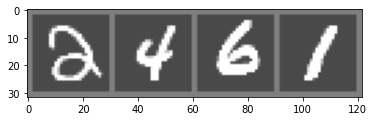

    2     4     6     1


In [14]:
# Load PyTorch library
import torch
import torchvision
import torchvision.transforms as transforms

# Define validation dataset ratio
valid_ratio = 0.3

# Define the MNIST training and validation sets, and possible transforms to be applied. Optional augmentation can be done within the transform.
transform = transforms.Compose(
    [
    # transforms.RandomRotation(degrees=30),
     transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

train_valid_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset))
nb_valid =  int(valid_ratio * len(train_valid_dataset))
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=500,
                                          shuffle=True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=500,
                                          shuffle=True)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

# Visualize the MNIST dataset
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4,]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Construct the neural network (Your turn)
helpful link for adding layers: https://pytorch.org/docs/stable/nn.html#

helpful link for adding functions: https://pytorch.org/docs/stable/nn.functional.html#

helpful link for building the neural network: https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, 3, 1)
      self.conv2 = nn.Conv2d(32, 64, 3, 1)
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)
      self.fc1 = nn.Linear(9216, 128)
      self.fc2 = nn.Linear(128, 10)

    # x represents our data
    def forward(self, x):
      # Pass data through conv1
      x = self.conv1(x)
      # Use the rectified-linear activation function over x
      x = F.relu(x)

      x = self.conv2(x)
      x = F.relu(x)

      # Run max pooling over x
      x = F.max_pool2d(x, 2)
      # Pass data through dropout1
      x = self.dropout1(x)
      # Flatten x with start_dim=1
      x = torch.flatten(x, 1)
      # Pass data through fc1
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)

      # Apply softmax to x
      output = F.log_softmax(x, dim=1)
      return output

### Train the model (Your turn)

In [16]:
# Instantiate the NN and print out the number of parameters
net = Net()
print(sum([p.numel() for p in net.parameters()]))

# Define the loss function and the optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=0.01)

# Select the device to train the NN! "cuda:0" means the first GPU device.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

# Train the NN and store the best model based on the validation loss.
import time

start_time = time.time()
best_loss = np.float('inf')
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    epoch_loss = running_loss / (i+1)
    print("Epoch: ", epoch, " train loss: ", '%.3f' % epoch_loss)
    with torch.no_grad(): 
      running_loss = 0.0
      for i, data in enumerate(validloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data[0].to(device), data[1].to(device)

          # forward 
          outputs = net(inputs)
          loss = criterion(outputs, labels)

          # print statistics
          running_loss += loss.item()
      epoch_loss = running_loss / (i+1)
      print("Epoch: ", epoch, " validation loss: ", '%.3f' % epoch_loss)
      if epoch_loss < best_loss:
        best_loss = epoch_loss

time_elap = (time.time() - start_time) // 60
print('Finished Training in %d mins' % time_elap)

1199882
cuda:0
Epoch:  0  train loss:  0.659
Epoch:  0  validation loss:  0.326
Epoch:  1  train loss:  0.281
Epoch:  1  validation loss:  0.275
Epoch:  2  train loss:  0.249
Epoch:  2  validation loss:  0.257
Epoch:  3  train loss:  0.234
Epoch:  3  validation loss:  0.255
Epoch:  4  train loss:  0.218
Epoch:  4  validation loss:  0.231
Epoch:  5  train loss:  0.208
Epoch:  5  validation loss:  0.210
Epoch:  6  train loss:  0.200
Epoch:  6  validation loss:  0.212
Epoch:  7  train loss:  0.194
Epoch:  7  validation loss:  0.228
Epoch:  8  train loss:  0.180
Epoch:  8  validation loss:  0.214
Epoch:  9  train loss:  0.178
Epoch:  9  validation loss:  0.198
Finished Training in 1 mins


### Generate test data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


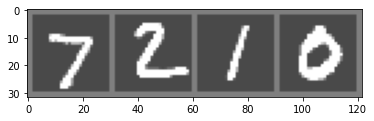

GroundTruth:      7     2     1     0


In [17]:
# Define the test dataset
transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)

# Visualize the test dataset
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Make prediction

In [18]:
# Get the predictions for the first 4 images in the test dataset.
with torch.no_grad():
  outputs = net(images.to(device))
  _, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
        
# Infer on the whole test dataset
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=1)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print('Accuracy of the network on the 10000 test images: %.3F %%' % (
    100 * correct / total))

Predicted:      7     2     1     0
Accuracy of the network on the 10000 test images: 93.730 %
